In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
df = pd.read_csv('../bookings.csv', parse_dates=['date', 'start_time', 'end_time'])
df = df.set_index('date').resample('D').mean().reset_index()
df.replace(np.nan, 0, inplace=True)
df['booked'] = df.total_time_hours.apply(lambda x: 1 if x > 0 else 0)
df = df.drop(['total_time_hours'], axis=1)
df.head()

,date,total_time_hours
0,2021-02-23,3.0
1,2021-02-24,0.0
2,2021-02-25,0.0
3,2021-02-26,0.0
4,2021-02-27,0.0


<AxesSubplot:xlabel='date'>

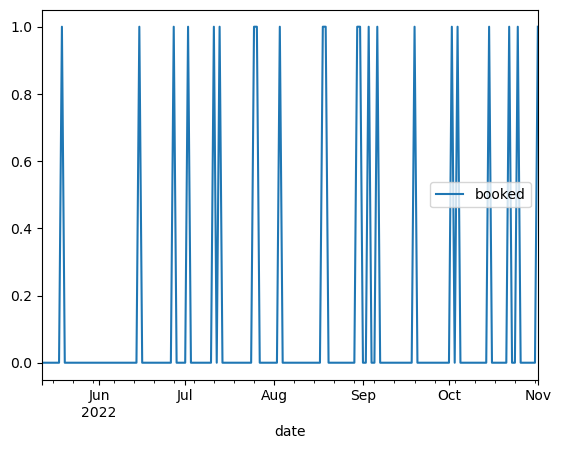

In [48]:
from datetime import datetime

# change index type to datetime 
#df.loc[(df.date < datetime(2022, 5, 11)) & (df.date > datetime(2021, 11, 1)), "booked"] = np.nan
df = df[(df.date > datetime(2022, 5, 11))]
df = df.set_index('date')
df.plot()

In [49]:
# to tensor
y = torch.tensor(df.booked.values, dtype=torch.float32)
test_size = 20
train_set = y[:-test_size]
test_set = y[-test_size:]
print(len(train_set), len(test_set))

154 20


[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
70 20


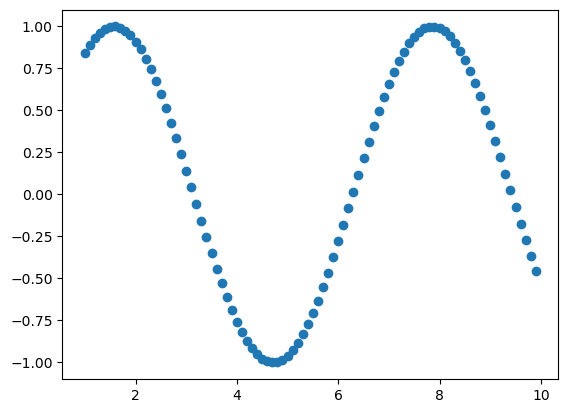

In [50]:
x_fake = np.arange(1, 10, 0.1)
print(x_fake)
y_fake = torch.tensor(np.sin(x_fake), dtype=torch.float32)
plt.scatter(x_fake, y_fake)

test_size = 20
train_set = y_fake[:-test_size]
test_set = y_fake[-test_size:]
print(len(train_set), len(test_set))

In [51]:
def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

In [52]:
window_size = 20
train_data = input_data(y_fake, window_size)
len(train_data)

70

In [53]:
train_data[0]

(tensor([0.8415, 0.8912, 0.9320, 0.9636, 0.9854, 0.9975, 0.9996, 0.9917, 0.9738,
         0.9463, 0.9093, 0.8632, 0.8085, 0.7457, 0.6755, 0.5985, 0.5155, 0.4274,
         0.3350, 0.2392]),
 tensor([0.1411]))

In [54]:
class LSTM(nn.Module):
    
    def __init__(self,input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [55]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1, momentum=0.9)

Epoch 0 Loss: 0.00012619841436389834
Performance on test range: 1.1128177642822266


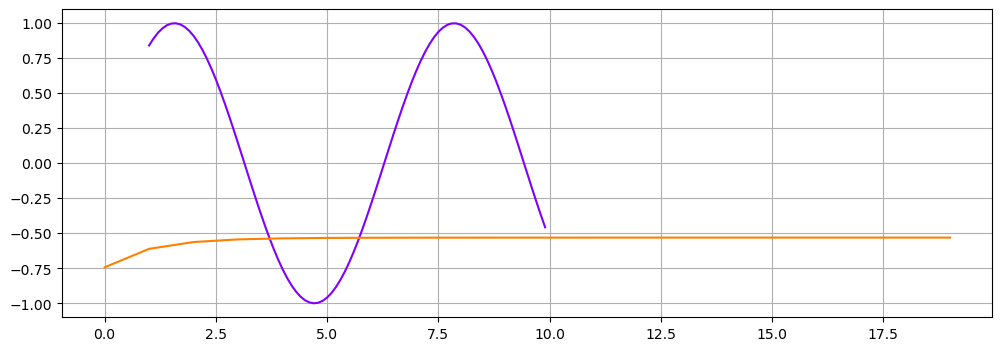

Epoch 1 Loss: 0.0006366727175191045
Performance on test range: 1.142714023590088


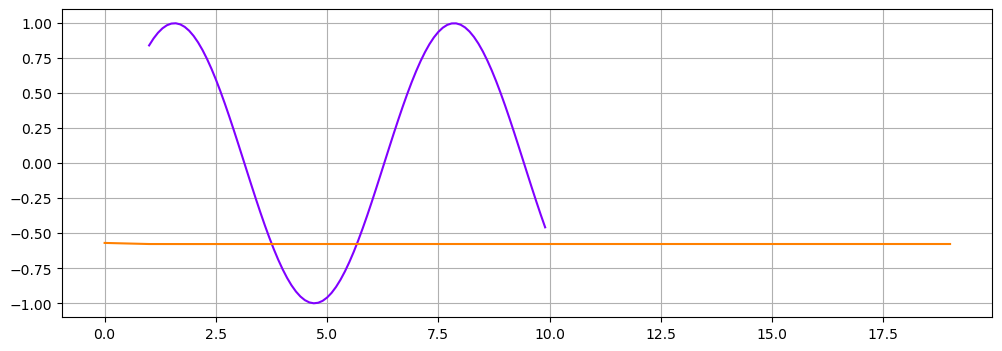

Epoch 2 Loss: 0.0002987801271956414
Performance on test range: 1.0510499477386475


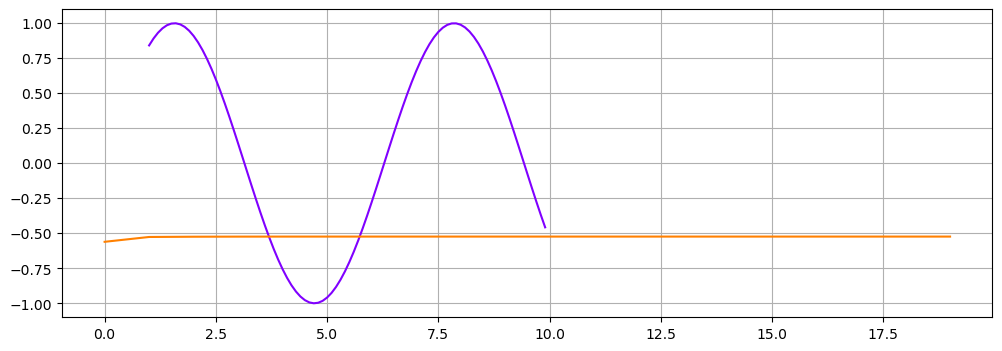

Epoch 3 Loss: 0.0005346398684196174
Performance on test range: 1.0692107677459717


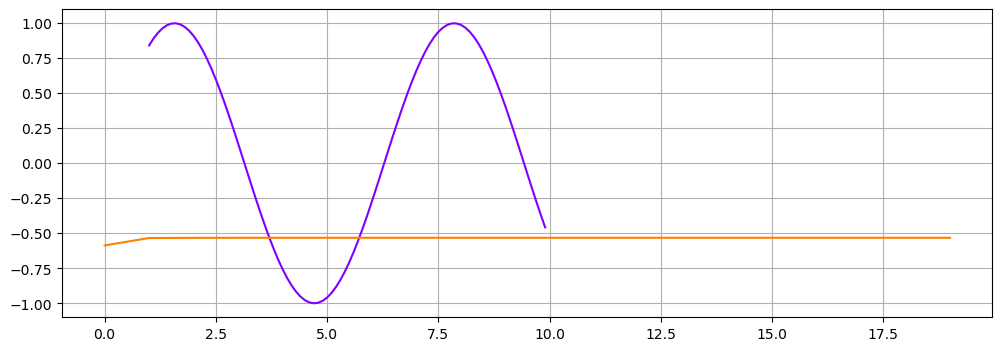

Epoch 4 Loss: 0.0005830561858601868
Performance on test range: 1.0746567249298096


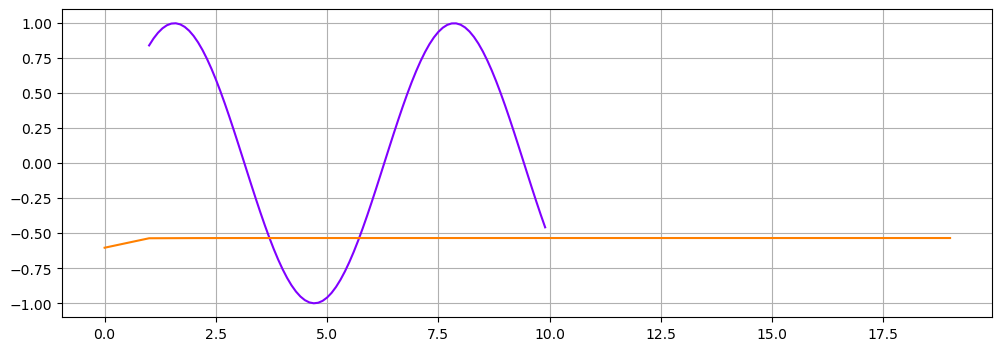

Epoch 5 Loss: 0.0006055558915250003
Performance on test range: 1.0781117677688599


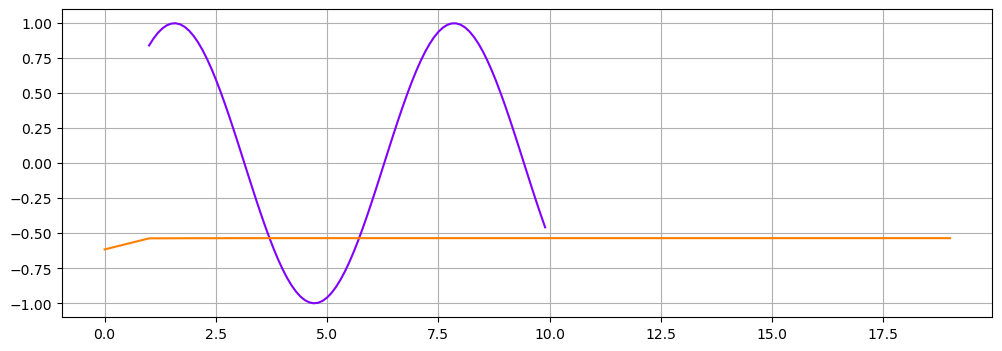

Epoch 6 Loss: 0.0006179615738801658
Performance on test range: 1.080448865890503


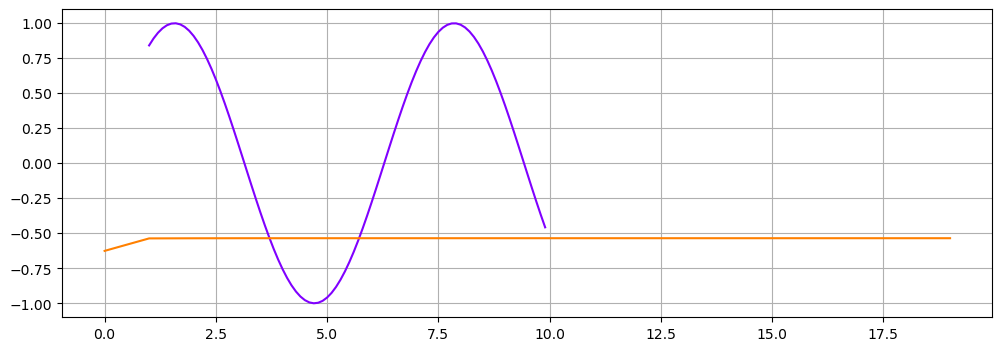

Epoch 7 Loss: 0.0006264122202992439
Performance on test range: 1.082224726676941


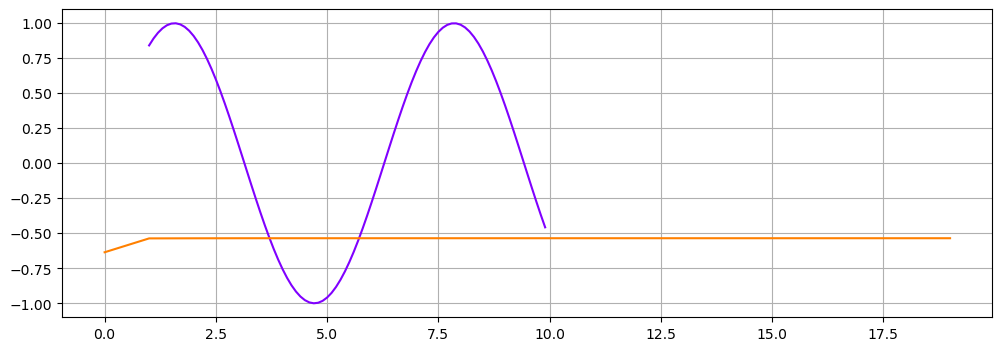

Epoch 8 Loss: 0.0006328403833322227
Performance on test range: 1.0836460590362549


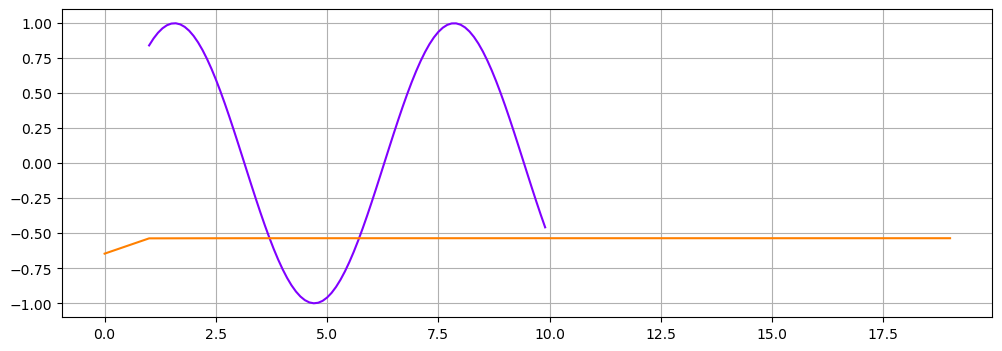

Epoch 9 Loss: 0.0006379125989042222
Performance on test range: 1.0848143100738525


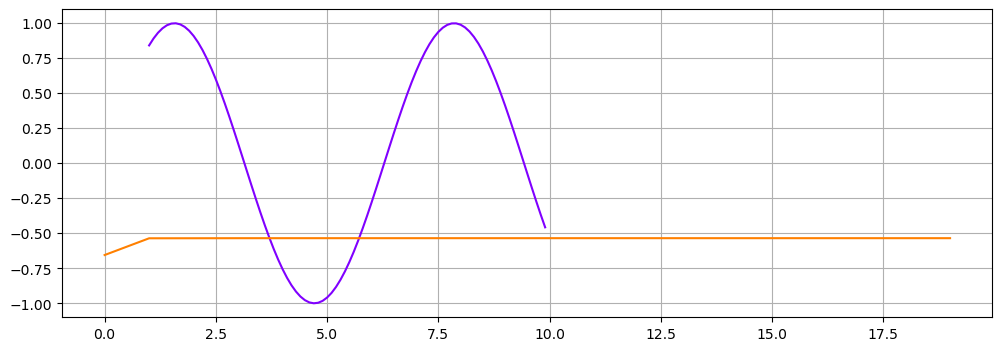

Epoch 10 Loss: 0.0006418765406124294
Performance on test range: 1.085798978805542


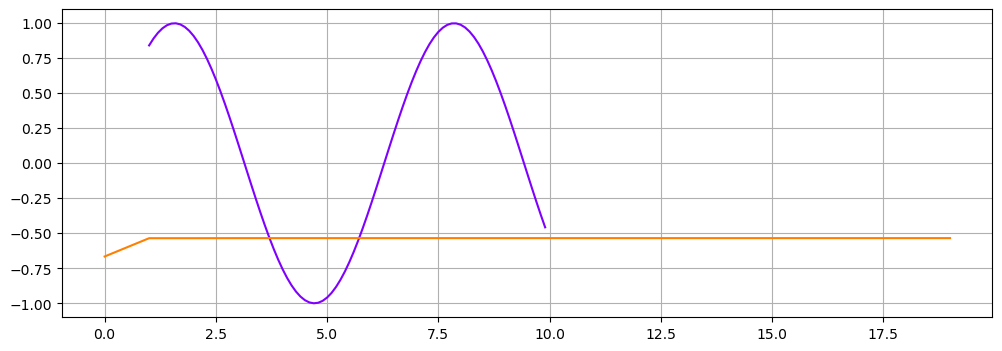

Epoch 11 Loss: 0.0006446687038987875
Performance on test range: 1.0866472721099854


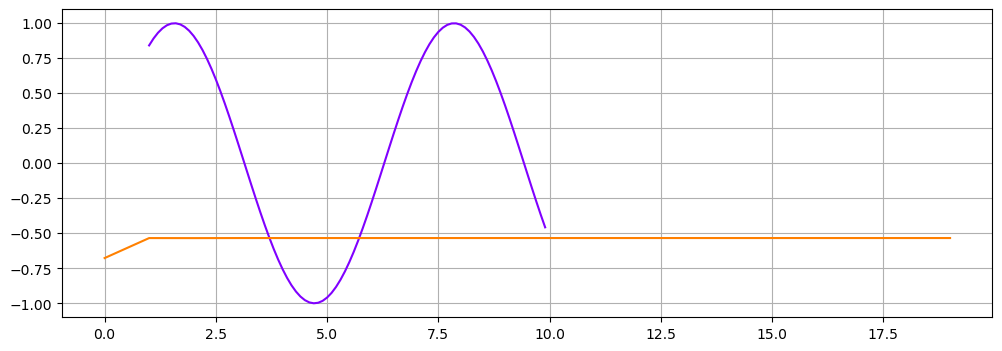

Epoch 12 Loss: 0.0006459799478761852
Performance on test range: 1.087389588356018


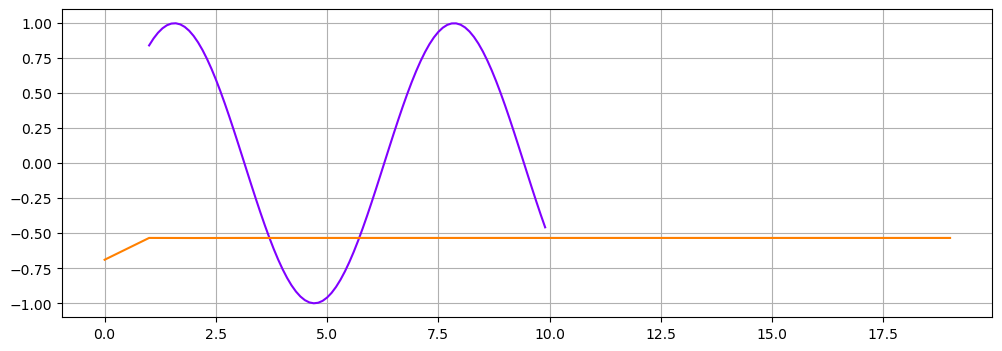

Epoch 13 Loss: 0.0006452620727941394
Performance on test range: 1.088050127029419


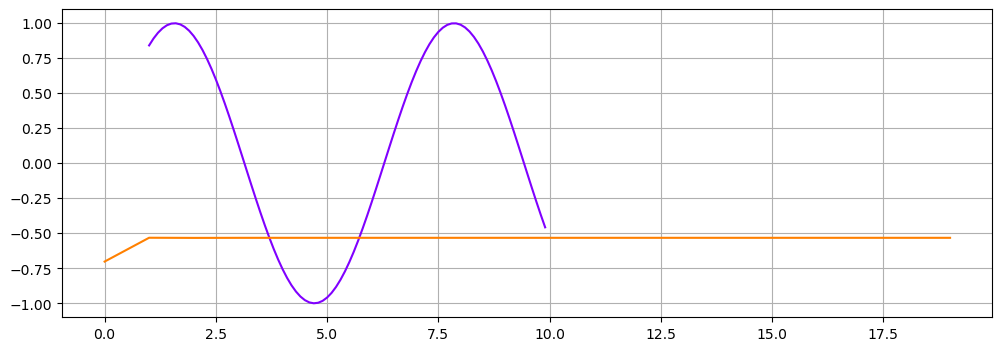

Epoch 14 Loss: 0.0006416530231945217
Performance on test range: 1.0886496305465698


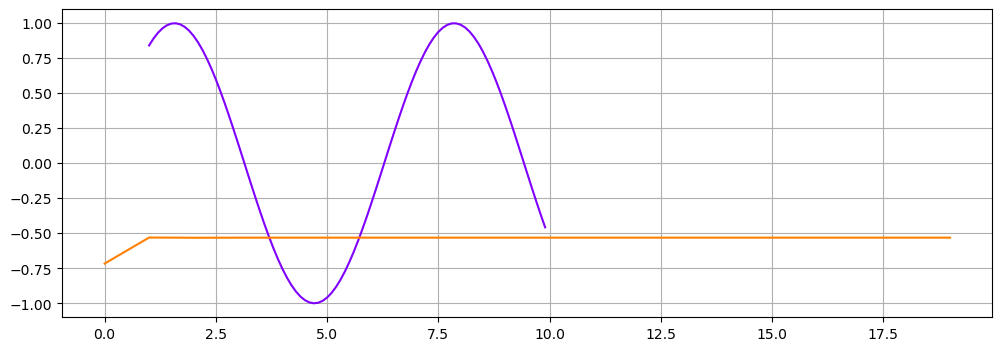

Epoch 15 Loss: 0.0006339504616335034
Performance on test range: 1.0892088413238525


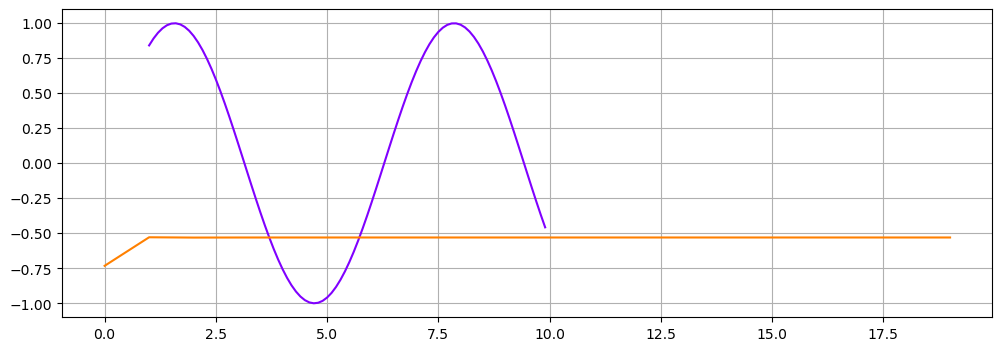

Epoch 16 Loss: 0.0006204206729307771
Performance on test range: 1.089755892753601


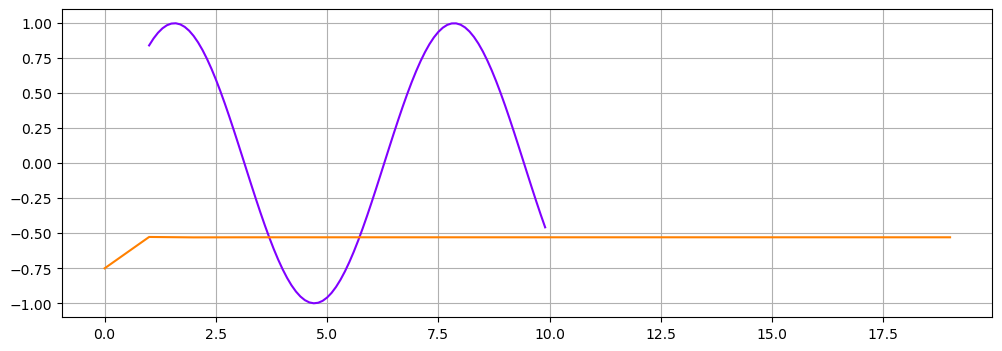

Epoch 17 Loss: 0.0005987926269881427
Performance on test range: 1.0903302431106567


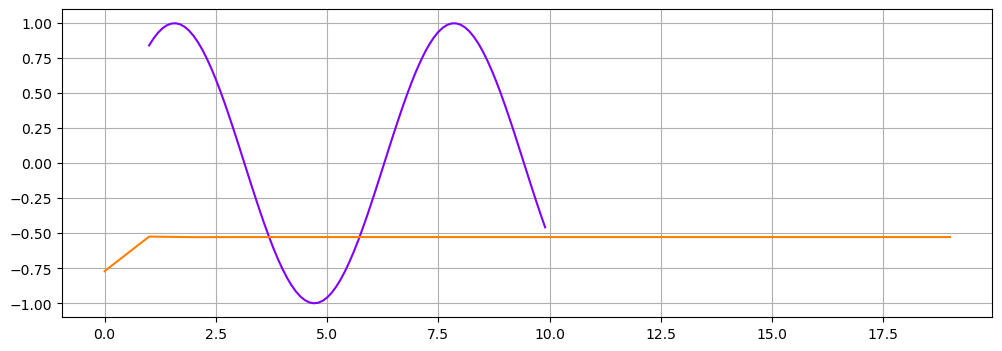

Epoch 18 Loss: 0.0005661159520968795
Performance on test range: 1.0909972190856934


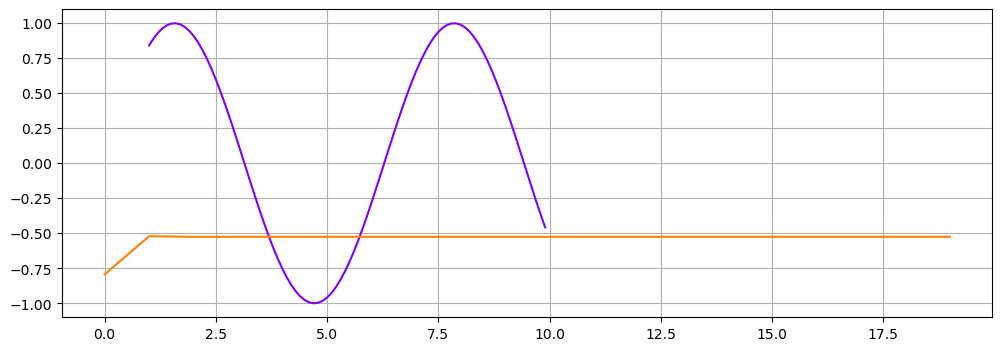

Epoch 19 Loss: 0.0005188687355257571
Performance on test range: 1.0918612480163574


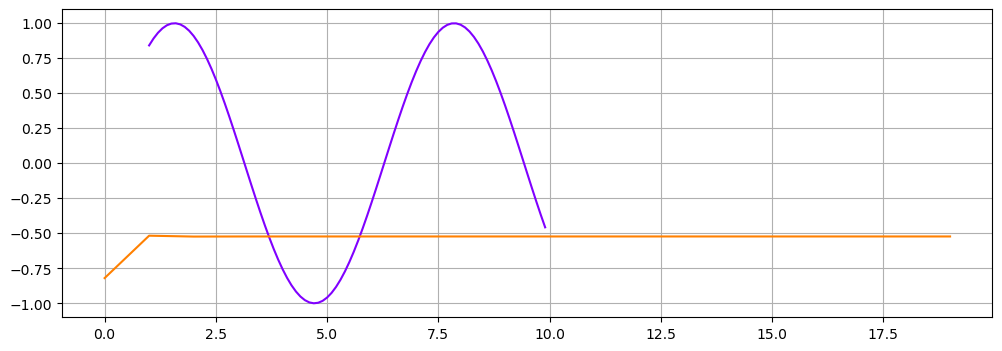

Epoch 20 Loss: 0.0004534178297035396
Performance on test range: 1.093094825744629


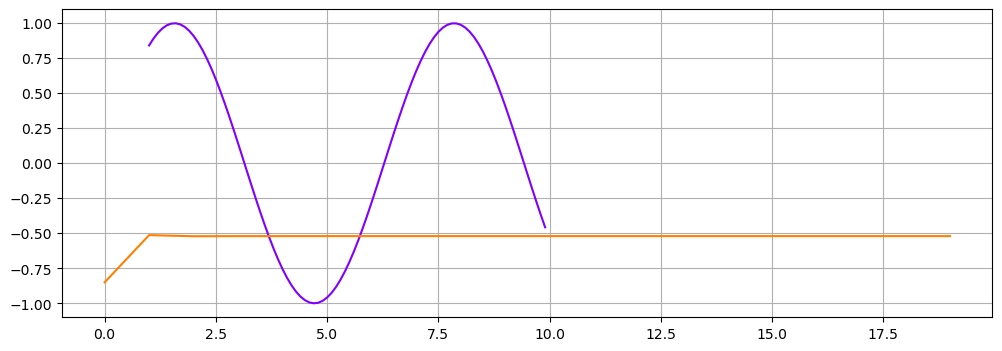

Epoch 21 Loss: 0.0003672564635053277
Performance on test range: 1.0949788093566895


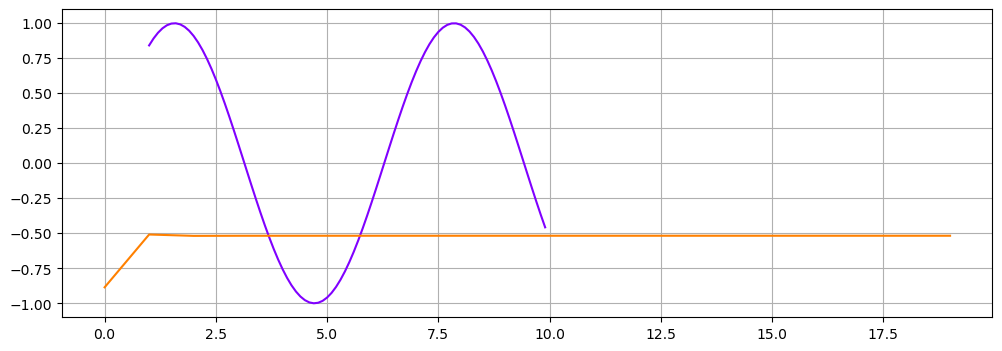

Epoch 22 Loss: 0.0002616056299302727
Performance on test range: 1.0979588031768799


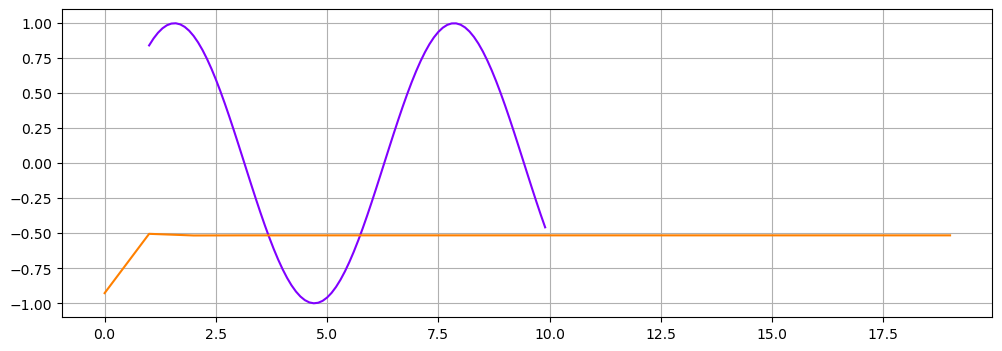

Epoch 23 Loss: 0.00014605492469854653
Performance on test range: 1.10272216796875


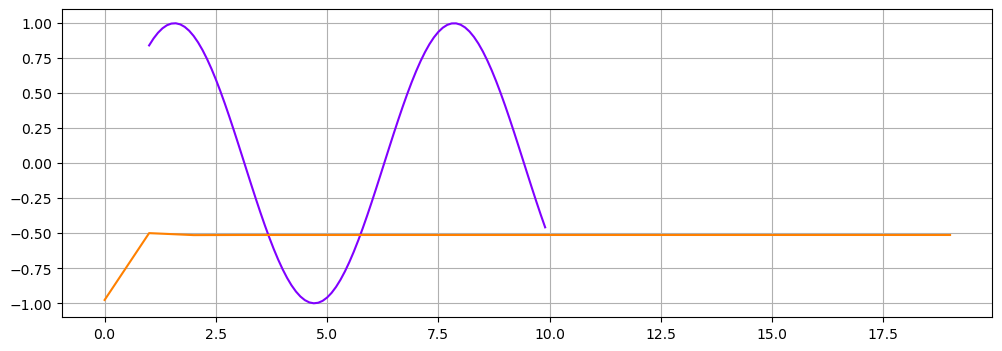

Epoch 24 Loss: 4.466915561351925e-05
Performance on test range: 1.1102715730667114


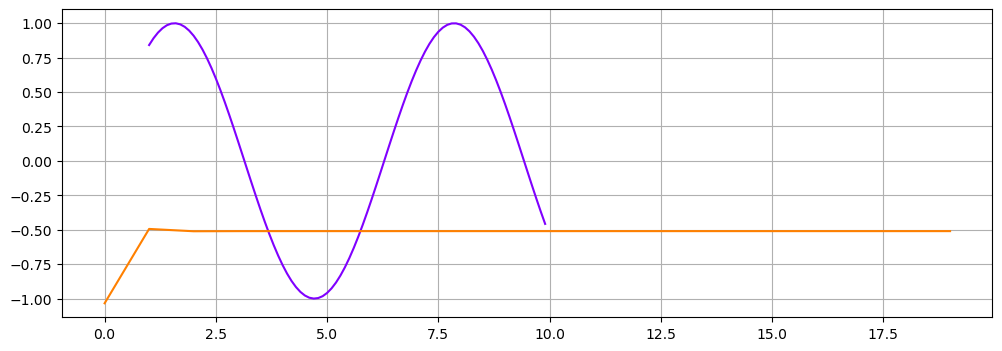

Epoch 25 Loss: 1.1408701539039612e-08
Performance on test range: 1.121941089630127


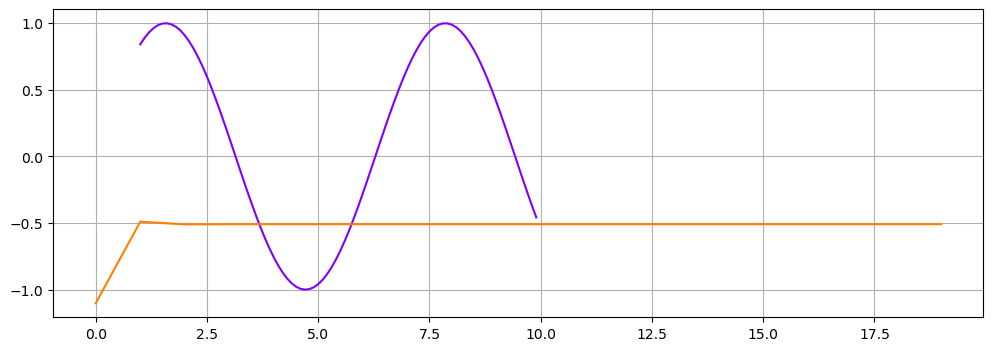

Epoch 26 Loss: 6.490513624157757e-05
Performance on test range: 1.1392419338226318


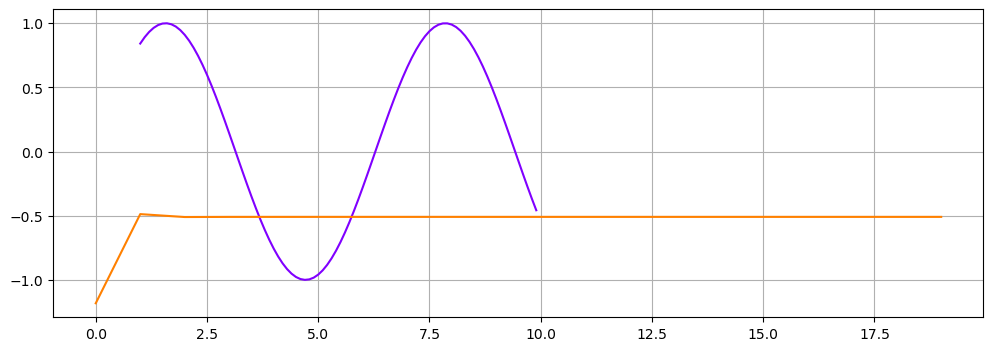

Epoch 27 Loss: 0.0002719224721658975
Performance on test range: 1.1634471416473389


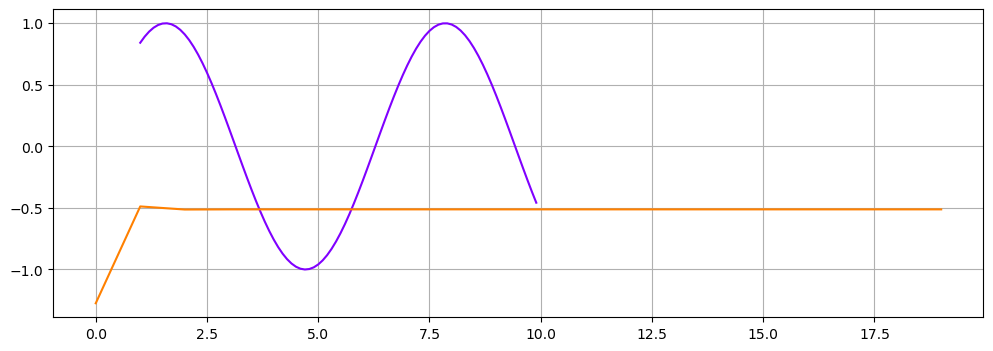

Epoch 28 Loss: 0.0005926737212575972
Performance on test range: 1.1950849294662476


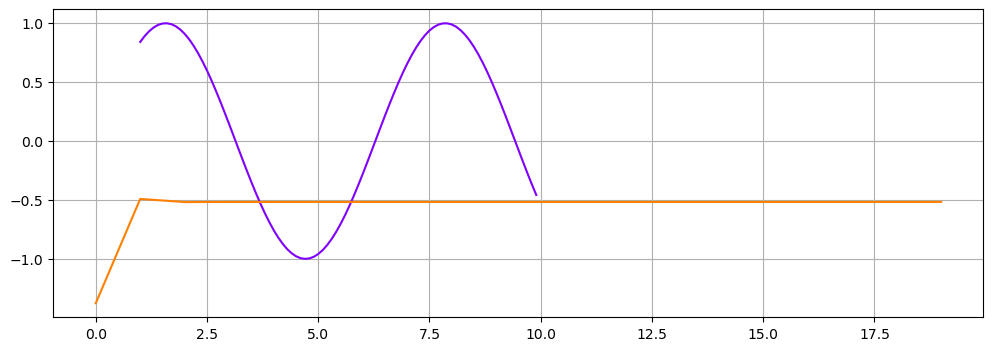

Epoch 29 Loss: 0.0009294445044361055
Performance on test range: 1.233930230140686


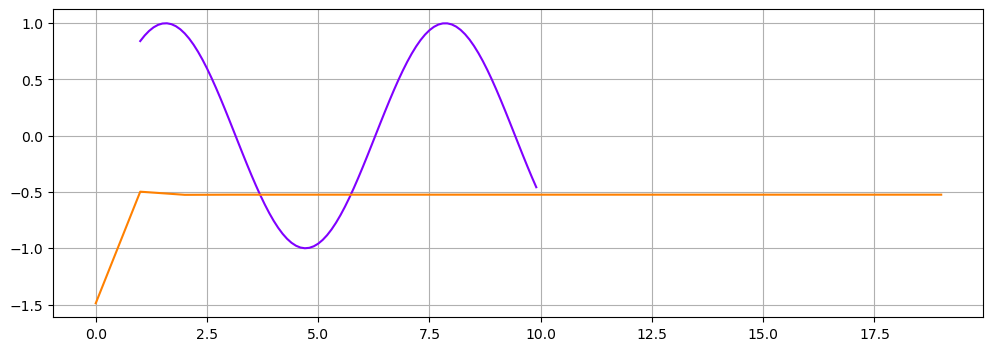

Epoch 30 Loss: 0.001151961158029735
Performance on test range: 1.2797176837921143


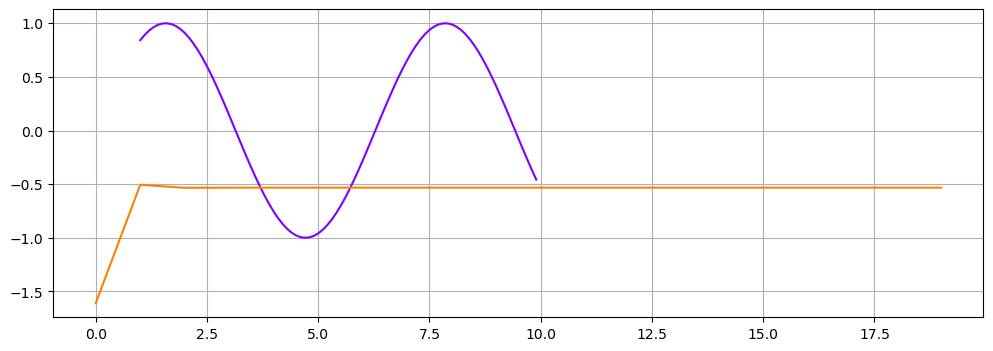

Epoch 31 Loss: 0.0011370013235136867
Performance on test range: 1.332672357559204


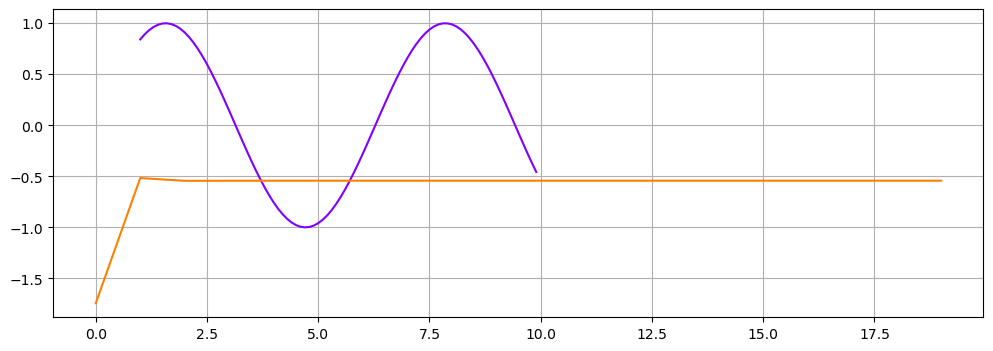

Epoch 32 Loss: 0.0008100392296910286
Performance on test range: 1.3931219577789307


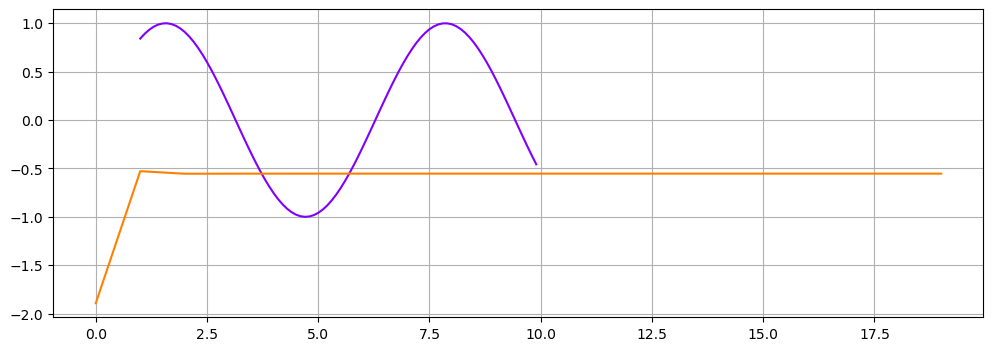

Epoch 33 Loss: 0.0002636263088788837
Performance on test range: 1.4604389667510986


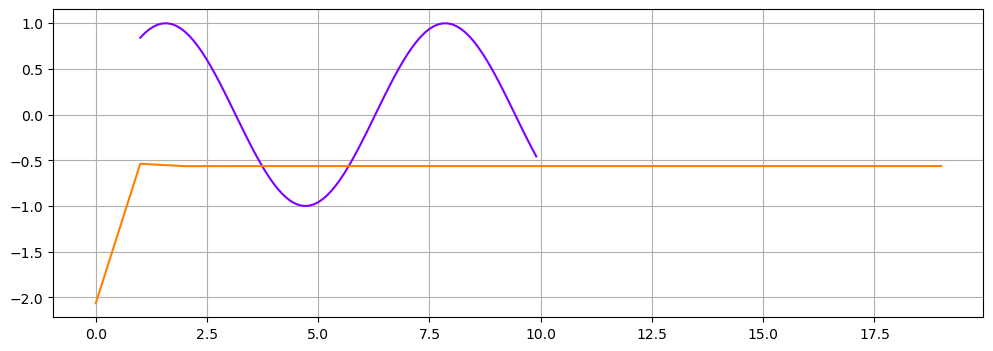

Epoch 34 Loss: 2.213573498011101e-05
Performance on test range: 1.5314302444458008


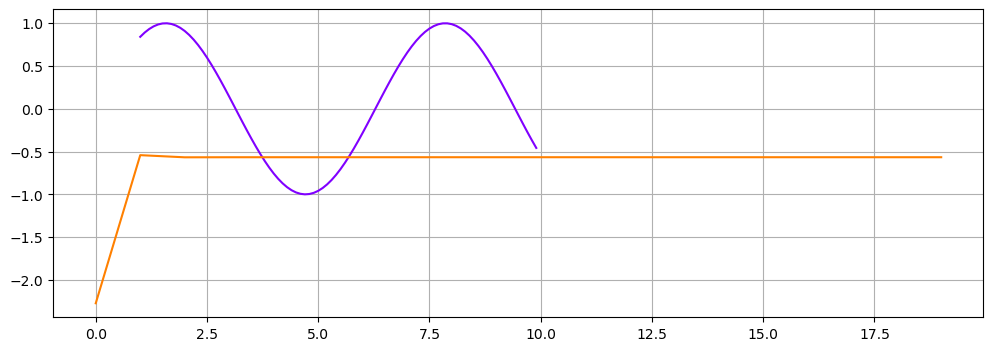

Epoch 35 Loss: 0.0008474293863400817
Performance on test range: 1.6013292074203491


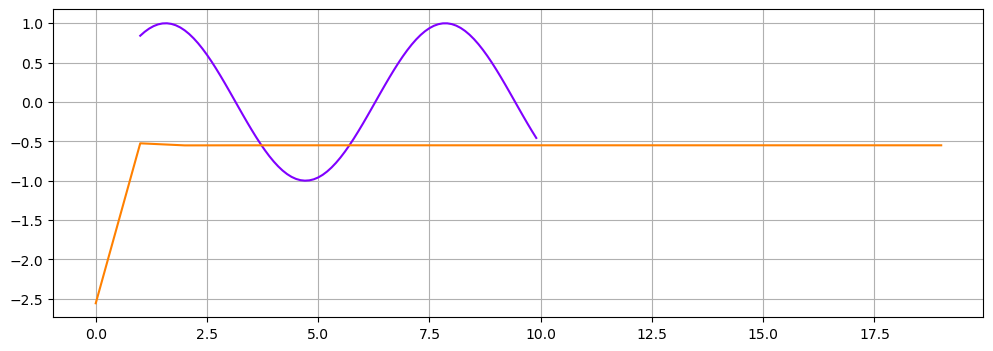

Epoch 36 Loss: 0.0003334287612233311
Performance on test range: 1.6802918910980225


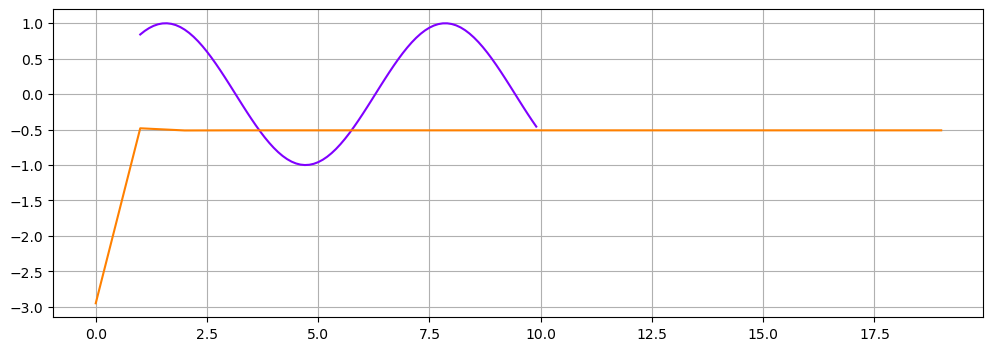

Epoch 37 Loss: 0.001242897124029696
Performance on test range: 1.8602163791656494


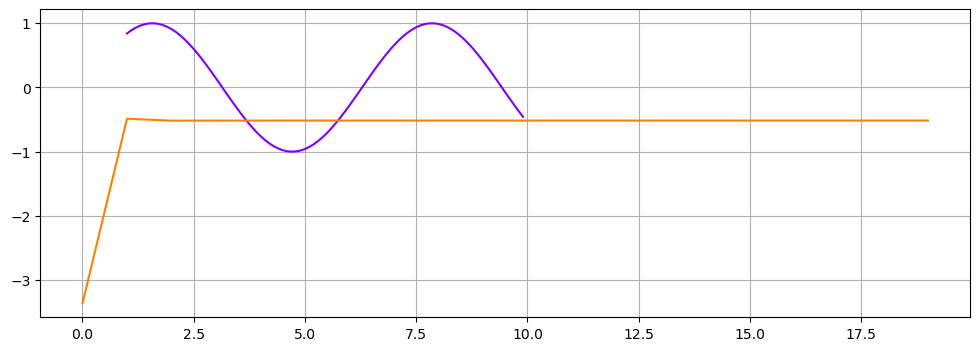

Epoch 38 Loss: 0.0011202491587027907
Performance on test range: 2.098060131072998


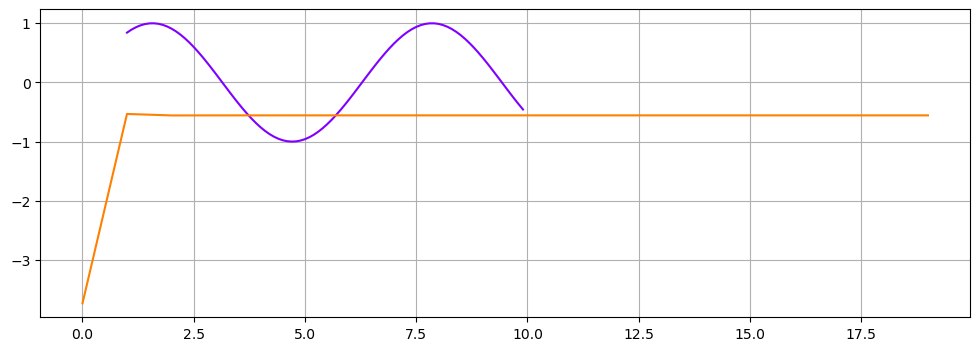

Epoch 39 Loss: 0.00011387193080736324
Performance on test range: 2.1962177753448486


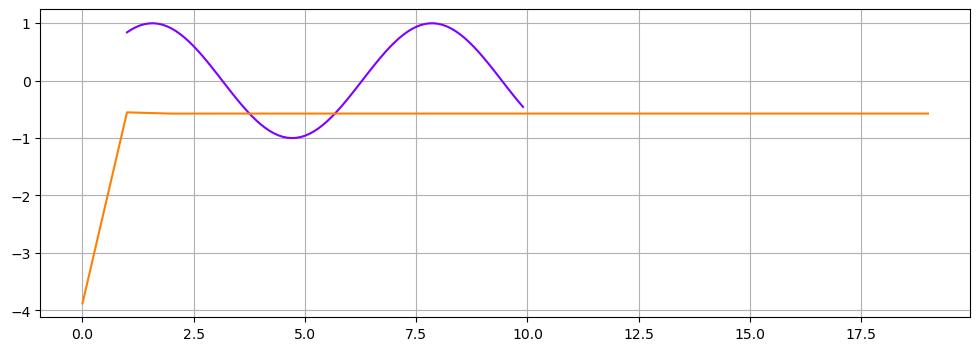

Epoch 40 Loss: 0.0006392968352884054
Performance on test range: 2.0025062561035156


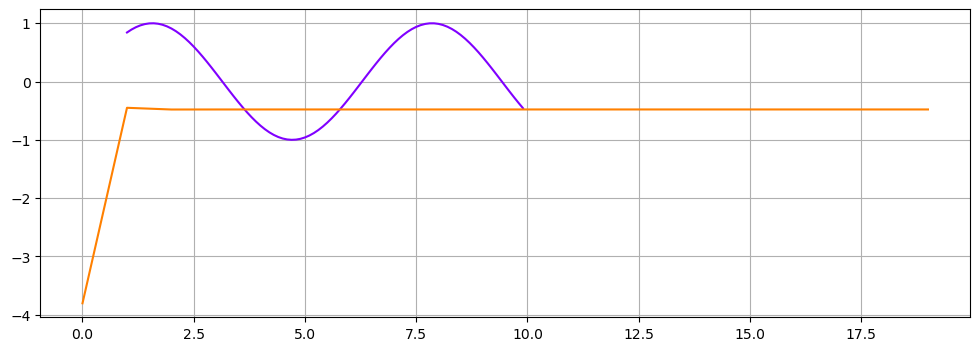

Epoch 41 Loss: 0.0038699053693562746
Performance on test range: 1.5280637741088867


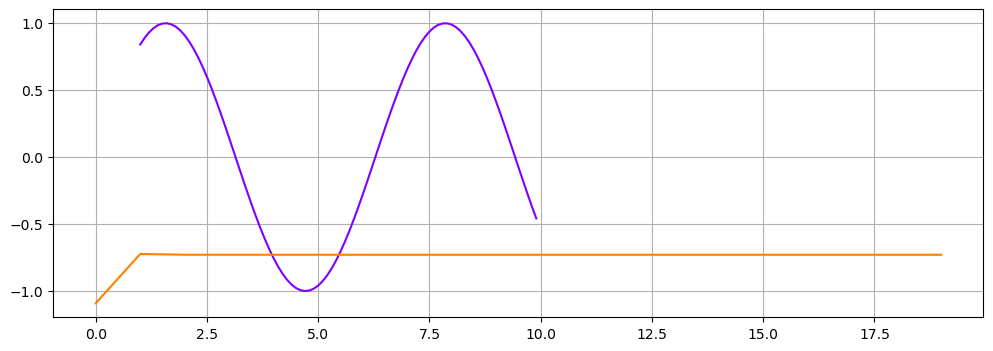

Epoch 42 Loss: 0.0009688793797977269
Performance on test range: 1.1057641506195068


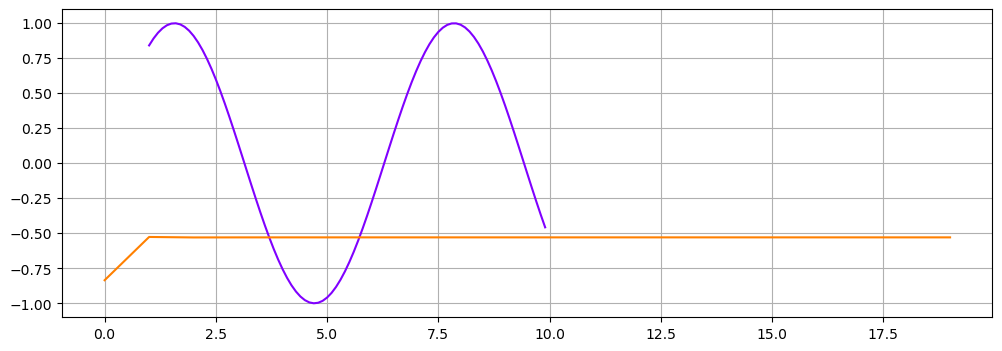

Epoch 43 Loss: 0.0006259155925363302
Performance on test range: 1.1094645261764526


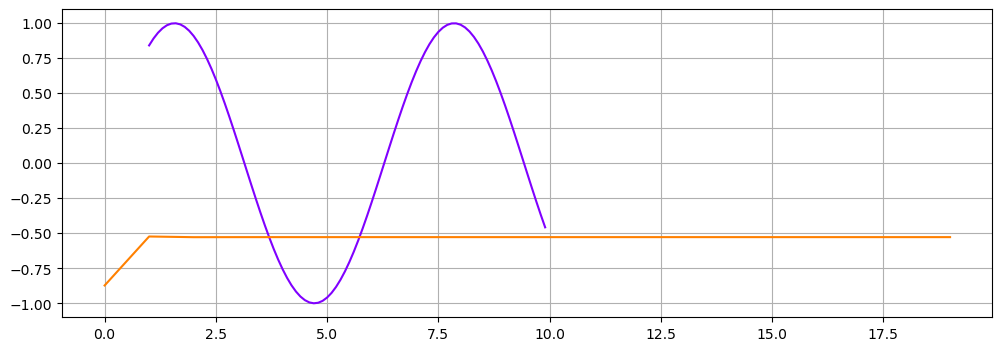

Epoch 44 Loss: 0.0005705037619918585
Performance on test range: 1.1134469509124756


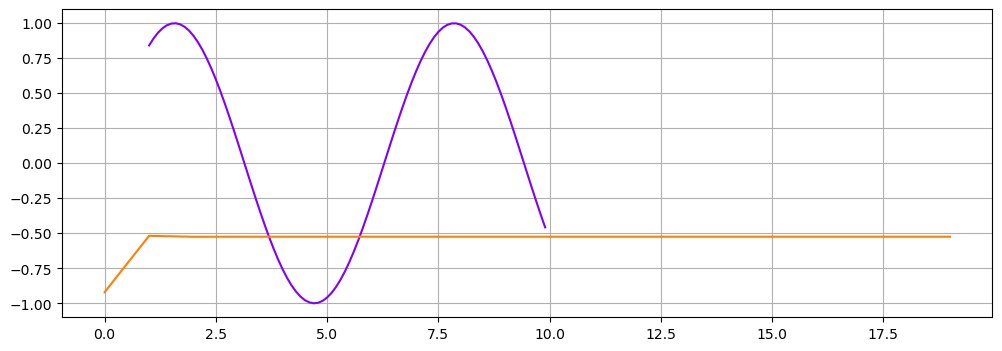

Epoch 45 Loss: 0.0004543804097920656
Performance on test range: 1.1180999279022217


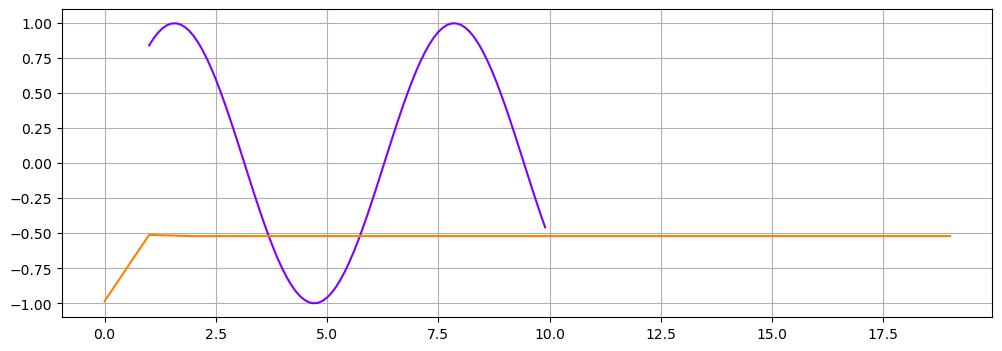

Epoch 46 Loss: 0.0002577473351266235
Performance on test range: 1.1263625621795654


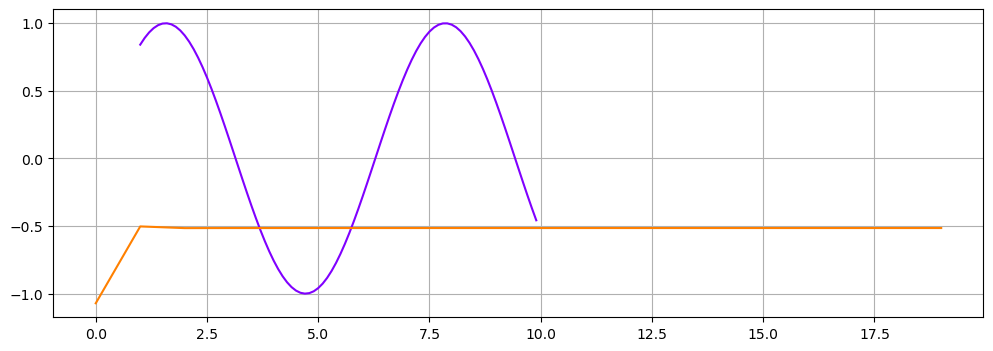

Epoch 47 Loss: 3.5125402064295486e-05
Performance on test range: 1.144012689590454


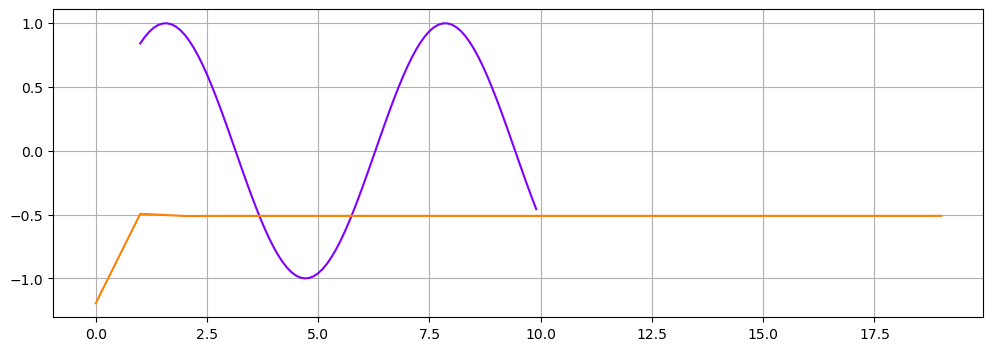

Epoch 48 Loss: 0.00011576882388908416
Performance on test range: 1.1842176914215088


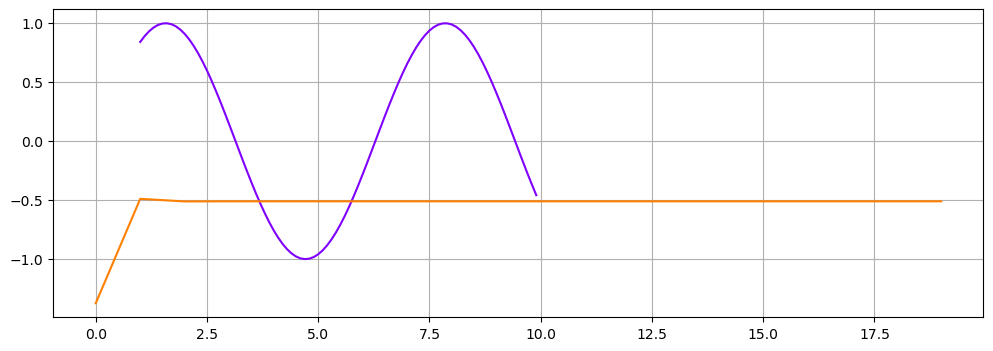

Epoch 49 Loss: 0.000821867142803967
Performance on test range: 1.2643697261810303


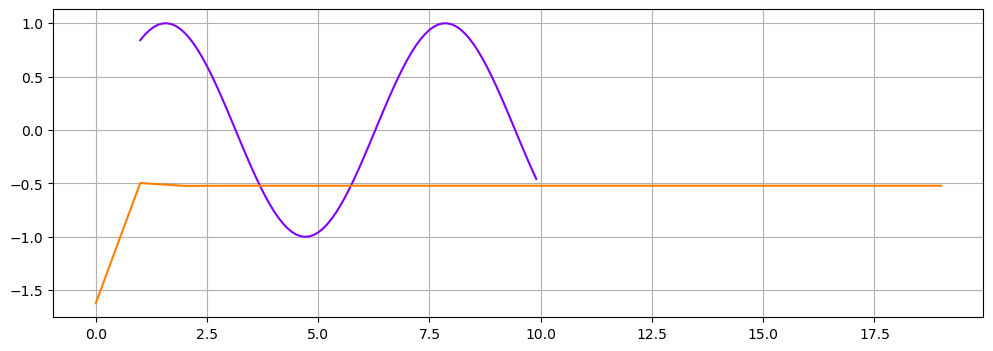

In [11]:
epochs = 50
future = 20

for i in range(epochs):
    
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
    loss = criterion(torch.tensor(preds[-window_size:]), y_fake[len(train_set):])
    print(f"Performance on test range: {loss}")
    
    plt.figure(figsize=(12,4))
    plt.grid(True)
    plt.plot(x_fake, y_fake.numpy(),color='#8000ff')
    plt.plot(range(0,20),preds[window_size:],color='#ff8000')
    plt.show()

In [70]:
df.reset_index().drop('date', axis=1).index

RangeIndex(start=0, stop=174, step=1)

## LSTM

In [111]:
df = pd.read_csv('../bookings.csv', parse_dates=['date', 'start_time', 'end_time'])
df = df.set_index('date').resample('D').mean().reset_index()
df.replace(np.nan, 0, inplace=True)
df['booked'] = df.total_time_hours#df.total_time_hours.apply(lambda x: 1 if x > 0 else 0)
df = df.drop(['total_time_hours'], axis=1)
df = df[(df.date > datetime(2022, 5, 11))]
df = df.set_index('date')
df.head()

,booked
date,
2022-05-12,0.0
2022-05-13,0.0
2022-05-14,0.0
2022-05-15,0.0
2022-05-16,0.0


In [113]:
print("Total samples:", len(df.booked.values))
X_train = np.array(range(120))
y_train = df.booked.values[:120]

X_test = np.array(range(120, 160))
y_test = df.booked.values[120:160]
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)
print("Train size", len(X_train))
print("Test size", len(X_test))

Total samples: 174
Train size 120
Test size 40


In [114]:
n_features = 1

train_series = y_train
test_series  = y_test

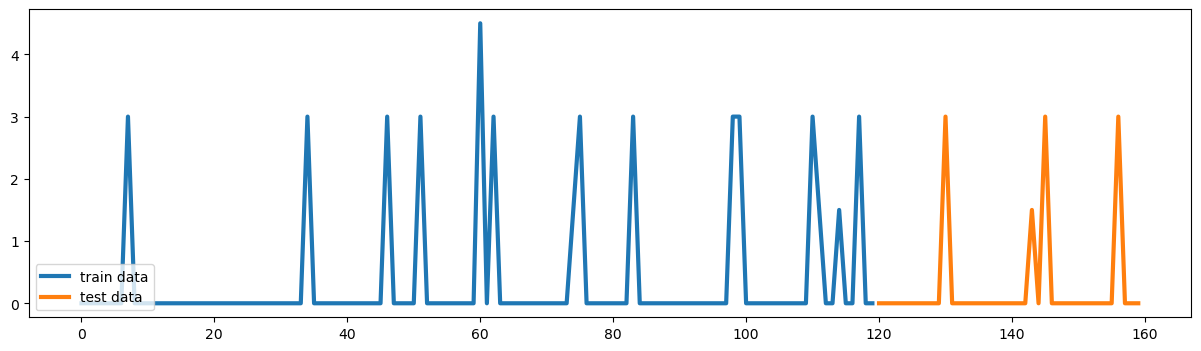

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=3, label='train data')
ax.plot(X_test, y_test,  lw=3, label='test data')
ax.legend(loc="lower left")
plt.show();

In [116]:
train_series = torch.from_numpy(train_series)
test_series = torch.from_numpy(test_series)

In [117]:
# LSTM expects input of (batch, sequence, features)
# So shape should be (1, 179, 20) and labels (1, 1, 179)
look_back = 20

train_dataset = []
train_labels = []
for i in range(len(train_series)-look_back):
    train_dataset.append(train_series[i:i+look_back])
    train_labels.append(train_series[i+look_back])
train_dataset = torch.stack(train_dataset).unsqueeze(0).to(torch.double)
train_labels = torch.stack(train_labels).unsqueeze(0).unsqueeze(2).to(torch.double)

print(train_dataset.shape)
print(train_labels.shape)

torch.Size([1, 100, 20])
torch.Size([1, 100, 1])


In [118]:
class Net(nn.Module):
    def __init__(self, n_neurons, input_shape):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_shape, n_neurons)
        self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons)
        self.fc = nn.Linear(n_neurons, 1)
    
    def forward(self, x):
        #out = self.fc1(x)
        out, _ = self.lstm(x)
        
        out = self.fc(out)
        return out

In [119]:
n_neurons = 4

model = Net(n_neurons, look_back).double()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#optimizer = torch.optim.SGD(model.parameters(), lr=1, momentum=0.9)

loss_curve = []
for epoch in range(200):
    loss_total = 0
    
    model.zero_grad()
    
    predictions = model(train_dataset)
    
    loss = loss_function(predictions, train_labels)
    loss_total += loss.item()
    loss.backward()
    optimizer.step()
    loss_curve.append(loss_total)

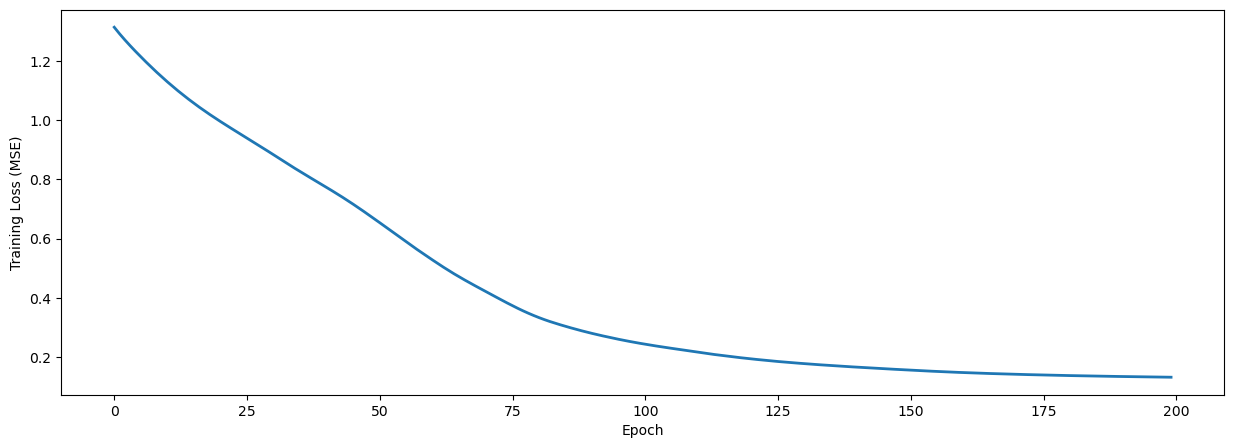

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(loss_curve, lw=2)
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss (MSE)")
plt.show()

In [121]:
# LSTM expects input of (batch, sequence, features)
# So shape should be (1, 179, 20)

test_dataset = []
test_labels = []
for i in range(len(test_series)-look_back):
    test_dataset.append(test_series[i:i+look_back])
    test_labels.append(test_series[i+look_back])
test_dataset = torch.stack(test_dataset).unsqueeze(0).to(torch.double)
test_labels = torch.stack(test_labels).unsqueeze(0).unsqueeze(2).to(torch.double)


print(test_dataset.shape)
with torch.no_grad():
    test_predictions = model(test_dataset).squeeze()


torch.Size([1, 20, 20])


(20,)


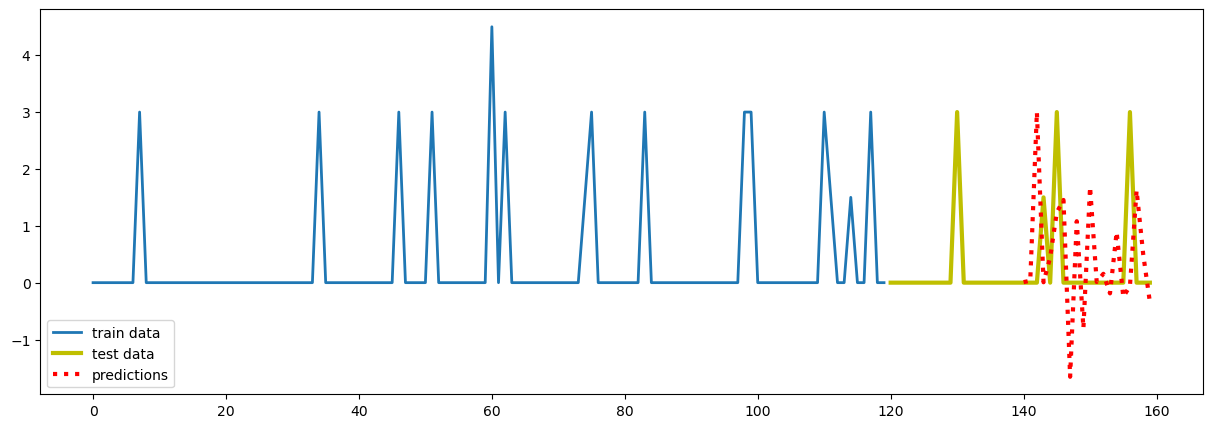

In [122]:
x = np.arange(140, 160,1)
print(x.shape)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();

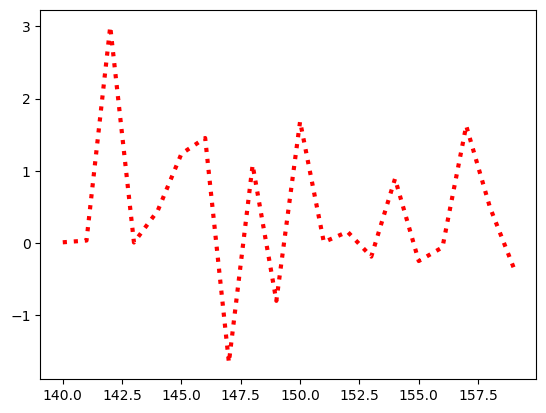

In [124]:
plt.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')